In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguins/penguins.csv


In [2]:
import pandas as pd

# Load the training dataset excluding null values
penguins  = pd.read_csv("../input/penguins/penguins.csv").dropna()

# Deep Learning Models work best when features are on a similar scale
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

In [3]:
# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
289,52.0,18.1,20.1,40.5,2
190,44.0,13.6,20.8,43.5,1
152,46.1,13.2,21.1,45.0,1
167,49.3,15.7,21.7,58.5,1
93,39.6,18.1,18.6,44.5,0
322,50.1,17.9,19.0,34.0,2
233,52.5,15.6,22.1,54.5,1
19,46.0,21.5,19.4,42.0,0
107,38.2,20.0,19.0,39.0,0
332,45.2,16.6,19.1,32.5,2


The **Species** column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

In [4]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 43.3 14.0 20.8 45.75 1 ] Gentoo
[ 47.8 15.0 21.5 56.5 1 ] Gentoo
[ 36.4 17.0 19.5 33.25 0 ] Adelie
[ 43.2 18.5 19.2 41.0 0 ] Adelie
[ 38.7 19.0 19.5 34.5 0 ] Adelie
[ 38.1 17.6 18.7 34.25 0 ] Adelie
[ 50.0 15.2 21.8 57.0 1 ] Gentoo
[ 47.3 13.8 21.6 47.25 1 ] Gentoo
[ 39.6 18.8 19.0 46.0 0 ] Adelie
[ 46.4 17.8 19.1 37.0 2 ] Chinstrap


As is common in a supervised learning problem, we'll split the dataset into a set of records with which to train the model, and a smaller set with which to validate the trained model.

In [5]:
from sklearn.model_selection import train_test_split
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'

# Split the 70-30% into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size = 0.30,
                                                    random_state = 0
                                                   )

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0, 24):
    print(x_train[n], y_train[n], "(" + penguin_classes[y_train[n]] + ")")

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


The *features* are the measurements for each penguin observation, and the *label* is a numeric value that indicates the species of penguin that the observation represents (Adelie, Gentoo, or Chinstrap).

## Install and import TensorFlow libraries

Since we plan to use TensorFlow to create our penguin classifier, we'll need to run the following two cells to install and import the libraries we intend to use.

> **Note** *Keras* is an abstraction layer over the base TensorFlow API. In most common machine learning scenarios, you can use Keras to simplify your code.

In [6]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 497.5 MB 21 kB/s              
     |████████████████████████████████| 462 kB 48.9 MB/s            
     |████████████████████████████████| 14.5 MB 47.2 MB/s            
     |████████████████████████████████| 2.1 MB 47.0 MB/s            
     |████████████████████████████████| 1.4 MB 40.0 MB/s            
     |████████████████████████████████| 5.8 MB 37.9 MB/s            
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.2
    Uninstalling tensorflow-2.6.2:
      Successfully uninstalled tensorflow-2.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set the random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.8.0
TensorFlow version: 2.8.0


## Prepare the data for TensorFlow

We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with TensorFlow. Specifically, we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

In [8]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set the data types for categorical variables
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


## Define a neural network

Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a *ReLU* activation function.
* A hidden layer that receives ten inputs and applies a *ReLU* activation function.
* An output layer that uses a *SoftMax* activation function to generate an output for each penguin species (which represent the classification probabilities for each of the three possible penguin species). Softmax functions produce a vector with probability values that sum to 1.

In [9]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

2022-03-14 10:00:20.316804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-03-14 10:00:20.333981: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply an Adam optimizer to a categorical cross-entropy loss function iteratively over 50 epochs.

In [10]:
# hyper-parameters for optimizers
learning_rate = 0.001
opt = optimizers.Adam(lr = learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


96/96 [==============================] - 1s 3ms/step - loss: 23.8942 - accuracy: 0.1912 - val_loss: 11.2900 - val_accuracy: 0.2165
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 5.0865 - accuracy: 0.2142 - val_loss: 1.5626 - val_accuracy: 0.1752
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 1.2712 - accuracy: 0.2727 - val_loss: 1.1591 - val_accuracy: 0.3139
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 1.1068 - accuracy: 0.3814 - val_loss: 1.0832 - val_accuracy: 0.4453
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 1.0432 - accuracy: 0.4598 - val_loss: 1.0545 - val_accuracy: 0.4574
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.5183 - val_loss: 1.0425 - val_accuracy: 0.4842
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 1.0118 - accuracy: 0.5601 - val_loss: 1.0315 - val_accuracy: 0.5547
Epoch 8/50
96/96 [===========

## Review training and validation loss
​
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:
* The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
* The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.
​
Let's plot the loss metrics and see:

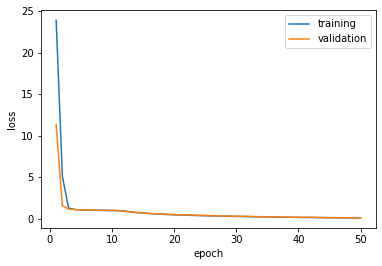

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## View the learned weights and biases

The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
* Layer 1: There are four input values going to ten output nodes, so there should be 4 x 10 weights and 10 bias values.
* Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
* Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [12]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[0]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.27236846 -0.3841947   0.03324002  0.08020484 -0.10909867  0.05677434
  -0.19284697  0.8463785   0.35794362 -0.4905011 ]
 [ 0.27471453  0.21265197  0.08151422 -0.17707926 -0.10406601  0.80808747
   0.34789595 -0.0542803  -0.6077911  -0.5447268 ]
 [-0.28836262 -0.634329    0.2833845   0.34767175  0.23550075 -0.01212116
   0.14559275 -0.79786885 -0.5164286   0.3296095 ]
 [-0.42851955 -0.24623463 -0.28597653 -0.5230521  -0.43773973  0.36985752
  -0.07648171  0.23638247  0.7525387  -0.4691702 ]] 
Biases:
 [[-0.27236846 -0.3841947   0.03324002  0.08020484 -0.10909867  0.05677434
  -0.19284697  0.8463785   0.35794362 -0.4905011 ]
 [ 0.27471453  0.21265197  0.08151422 -0.17707926 -0.10406601  0.80808747
   0.34789595 -0.0542803  -0.6077911  -0.5447268 ]
 [-0.28836262 -0.634329    0.2833845   0.34767175  0.23550075 -0.01212116
   0.14559275 -0.79786885 -0.5164286   0.3296095 ]
 [-0.42851955 -0.24623463 -0.28597653 -0.5230521  -0.43773973  0.36985752
  -0.07648171  0.


So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performance of a classification model is to create a *confusion matrix* that shows a crosstab of correct and incorrect predictions for each class.

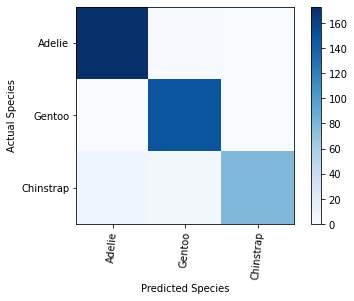

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

## Save the trained model
Now that we have a model we believe is reasonably accurate, we can save its trained weights for use later.

In [14]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


## Use the trained model

When we have a new penguin observation, we can use the model to predict the species.

In [15]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
Gentoo
